In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir = '../Results/cp/*'
files = glob.glob(dir)

In [3]:
files[2]

'../Results/cp/Mobilenet_Het_freezeFalse_cp3_test4.npy'

In [4]:
class score():
    def __init__(self, file):
        with open(file, 'rb') as f:
            self.cal_arr = np.load(f) # class 0, 1, 2, 3, label
            self.test_arr = np.load(f) # class 0, 1, 2, 3, label
            self.cp_arr = np.load(f) # index, quantile, marginal prob, marginal length, num empty sets
            self.acp_arr = np.load(f) # index, quantile, marginal prob, marginal length, num empty sets

In [5]:
moblienet = score(files[2])
resnet18 = score(files[3])
resnet34 = score(files[1])
resnet50 = score(files[0])

In [6]:
moblienet.cal_arr.shape

(26276, 5)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


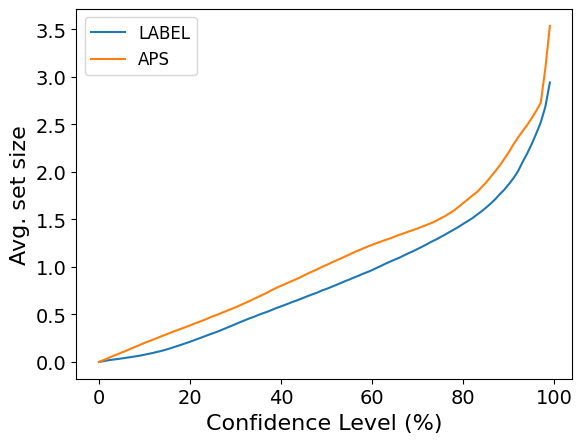

In [7]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "Times New Roman",})

plt.plot(moblienet.cp_arr[:, 3], label = 'LABEL')
plt.plot(moblienet.acp_arr[:, 3], label = 'APS')
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Avg. set size', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("setsize_mobilenet.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
x = np.arange(0, 100, 1)

In [9]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

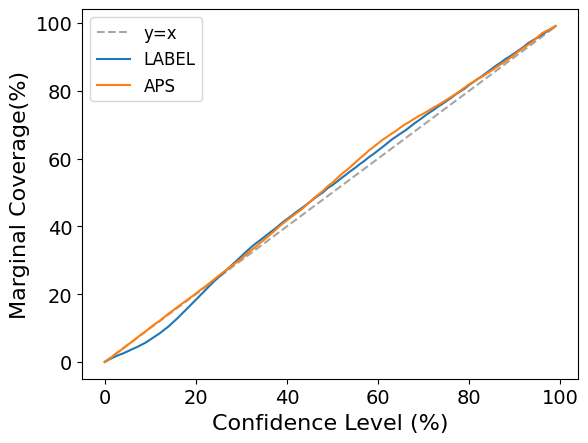

In [31]:
plt.plot(x, label = 'y=x', ls = '--', c = 'grey', alpha = 0.7)
plt.plot(moblienet.cp_arr[:, 2]*100, label = 'LABEL', c = plt.cm.tab10(0))
plt.plot(moblienet.acp_arr[:, 2]*100, label = 'APS', c = plt.cm.tab10(1))
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Marginal Coverage(%)', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("Marginal_cov_mobilenet.png", dpi=300, bbox_inches='tight')
plt.show()

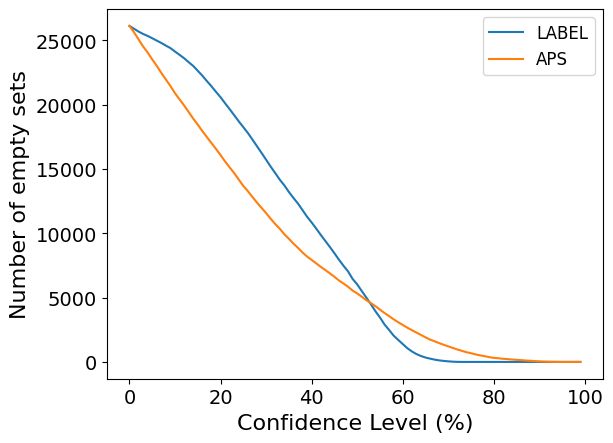

In [11]:
plt.plot(moblienet.cp_arr[:, 4], label = 'LABEL')
plt.plot(moblienet.acp_arr[:, 4], label = 'APS')
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Number of empty sets', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("Num_empty_mobilenet.png", dpi=300, bbox_inches='tight')
plt.show()

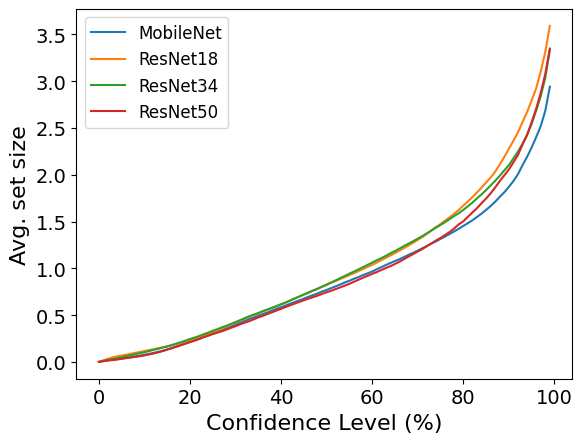

In [53]:
plt.plot(moblienet.cp_arr[:, 3], label = 'MobileNet')
plt.plot(resnet18.cp_arr[:, 3], label = 'ResNet18')
plt.plot(resnet34.cp_arr[:, 3], label = 'ResNet34')
plt.plot(resnet50.cp_arr[:, 3], label = 'ResNet50')
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Avg. set size', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("setsize_models.png", dpi=300, bbox_inches='tight')
plt.show()

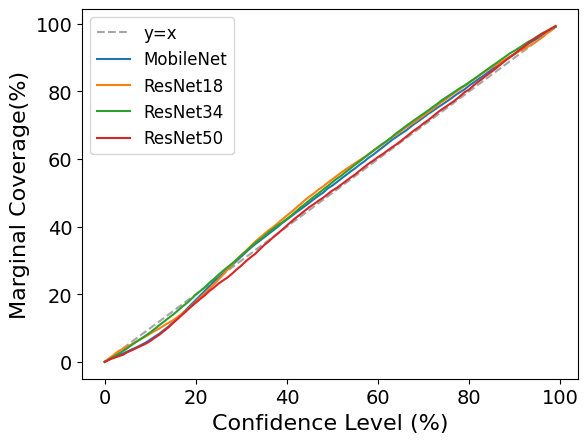

In [54]:
plt.plot(x, label = 'y=x', ls = '--', c = 'grey', alpha = 0.7)
plt.plot(moblienet.cp_arr[:, 2]*100, label = 'MobileNet', c = plt.cm.tab10(0))
plt.plot(resnet18.cp_arr[:, 2]*100, label = 'ResNet18', c = plt.cm.tab10(1))
plt.plot(resnet34.cp_arr[:, 2]*100, label = 'ResNet34', c = plt.cm.tab10(2))
plt.plot(resnet50.cp_arr[:, 2]*100, label = 'ResNet50', c = plt.cm.tab10(3))
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Marginal Coverage(%)', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("Marginal_cov_models.png", dpi=300, bbox_inches='tight')
plt.show()

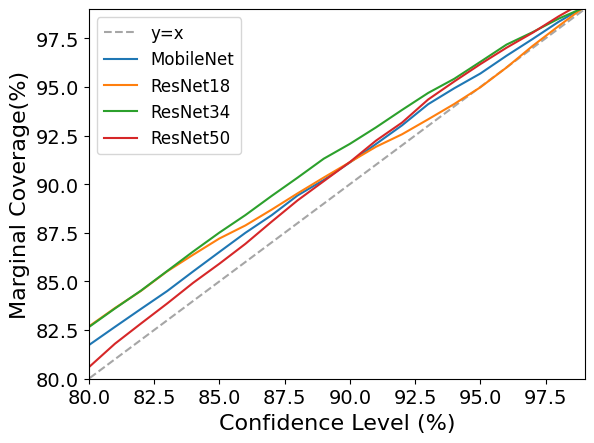

In [55]:
plt.plot(x, label = 'y=x', ls = '--', c = 'grey', alpha = 0.7)
plt.plot(moblienet.cp_arr[:, 2]*100, label = 'MobileNet', c = plt.cm.tab10(0))
plt.plot(resnet18.cp_arr[:, 2]*100, label = 'ResNet18', c = plt.cm.tab10(1))
plt.plot(resnet34.cp_arr[:, 2]*100, label = 'ResNet34', c = plt.cm.tab10(2))
plt.plot(resnet50.cp_arr[:, 2]*100, label = 'ResNet50', c = plt.cm.tab10(3))
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlim(80, 99)
plt.ylim(80, 99)
# plt.xticks(ticks = moblienet.cp_arr[79:, 0], fontsize = 14)
plt.ylabel('Marginal Coverage(%)', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("Marginal_cov_models_zoom.png", dpi=300, bbox_inches='tight')
plt.show()

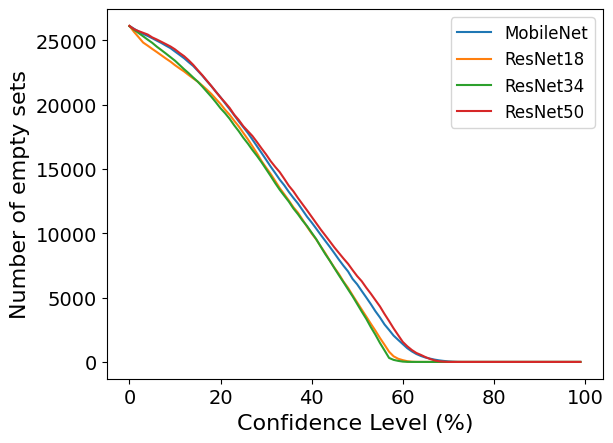

In [56]:
plt.plot(moblienet.cp_arr[:, 4], label = 'MobileNet')
plt.plot(resnet18.cp_arr[:, 4], label = 'ResNet18')
plt.plot(resnet34.cp_arr[:, 4], label = 'ResNet34')
plt.plot(resnet50.cp_arr[:, 4], label = 'ResNet50')
plt.legend(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Number of empty sets', fontsize = 16)
plt.xlabel('Confidence Level (%)', fontsize = 16)
plt.savefig("Num_empty_models.png", dpi=300, bbox_inches='tight')
plt.show()

In [74]:
moblienet.cp_arr[95, :]

array([9.50000000e+01, 6.41365796e-02, 9.56894572e-01, 2.29155501e+00,
       0.00000000e+00])